<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 50px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  LAB-02: LÀM VIỆC VÀ TRỰC QUAN HÓA DỮ LIỆU CHUỖI THỜI GIAN<Title>
</div>

<h2 style="text-align:center;">Nhóm 23</h2>

## Thông tin nhóm: 

<center>

| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Công Đắt     | 20120454  |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Lê Trần Như Ngọc       | 21120296  |
| Lê Thị Minh Phương | 21120533  |

</center>

## Giảng viên hướng dẫn:
**Thầy Lê Nhựt Nam**

### Chủ đề: **Phân tích và trực quan giá cổ phiếu của top 6 ngân hàng có trị thương hiệu tốt nhất Việt Nam**

# **Phần C: Khám phá mối quan hệ trong dữ liệu.**

## **I. Chuẩn bị**

### 1. Nhập các thư viện

In [117]:
# Nhập các thư viện cần dùng
import numpy as np
import pandas as pd

import warnings
# Bỏ qua tất cả các cảnh báo
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

### 2. Nhập dữ liệu

In [23]:
full_df = pd.read_csv("./Data/full_data.csv")
full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df = full_df.set_index(pd.DatetimeIndex(full_df['Date'].values))
full_df.shape

(8963, 9)

## **II. Phân tích và trực quan hoá.**

### **1. Liệu có sự tương quan nào giữa (sự biến động) giá cổ phiếu với giá trị thương hiệu của top 6 ngân hàng có giá trị thương hiệu cao nhất trong giai đoạn 2021-2023** - pending

#### **Thông tin đang quan tâm:**
Sự tương quan giữa giá cổ phiếu với giá trị thương hiệu của các ngân hàng.

#### **Hướng tiếp cận:**
- Thu thập thông tin về giá trị thương hiệu của từng ngân hàng.
- Tiền xử lý dữ liệu chứng khoán cho giai đoạn 2021-2023 đề phù hợp với mục đính so sánh.
- Minh hoạ bằng các biểu đồ phù hợp.

#### **Cách trực quan để trả lời câu hỏi:**

In [186]:
brand_value_df = pd.read_csv("./Data/brand_value.csv", header=0)
brand_value_df

,Bank,Stock symbol,Year,Word rank,Vietnam rank,Brand value ($M),Brand Value Change
0,Vietcombank,VCB,2021,180,6,1048.0,NaN
1,Vietcombank,VCB,2022,162,7,1344.0,0.282
2,Vietcombank,VCB,2023,137,4,1917.0,0.427
3,BIDV,BID,2021,246,13,NaN,NaN
4,BIDV,BID,2022,212,13,831.0,NaN
5,BIDV,BID,2023,161,7,1404.0,0.690
6,VietinBank,CTG,2021,216,10,793.0,NaN
7,VietinBank,CTG,2022,184,9,1064.0,0.342
8,VietinBank,CTG,2023,171,10,1302.0,0.220
9,Techcombank,TCB,2021,270,15,524.0,NaN


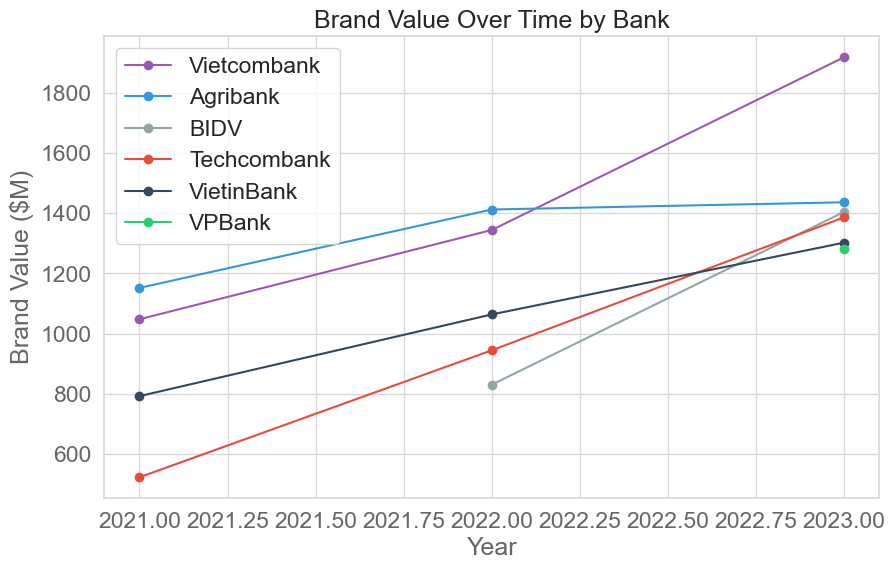

In [191]:
# Lọc bỏ các dòng có giá trị None (NaN) trong cột Brand value ($M)
brand_value_df = brand_value_df.dropna(subset=['Brand value ($M)'])

# Tạo biểu đồ đường cho mỗi ngân hàng
plt.figure(figsize=(10, 6))

for bank in brand_value_df['Bank'].unique():
    bank_df = brand_value_df[brand_value_df['Bank'] == bank]
    plt.plot(bank_df['Year'], bank_df['Brand value ($M)'], marker='o', label=bank)

plt.title('Brand Value Over Time by Bank')
plt.xlabel('Year')
plt.ylabel('Brand Value ($M)')
plt.legend()
plt.grid(True)
plt.show()

In [166]:
# Chuyển cột Date sang định dạng thời gian và trích xuất quý và năm
full_df['Date'] = pd.to_datetime(full_df['Date'])
full_df['Quarter'] = full_df['Date'].dt.quarter
full_df['Year'] = full_df['Date'].dt.year

# Tạo cột mới kết hợp quý và năm
full_df['Quarter-Year'] = 'Q' + full_df['Quarter'].astype(str) + '-' + full_df['Year'].astype(str)

# Tạo stock_in_quarter_df
stock_in_quarter_df = full_df.groupby(['Quarter-Year', 'Stock symbol', 'Bank']).agg({
    'Price': 'mean',
    'Open': 'mean',
    'High': 'max',
    'Low': 'min',
    'Vol.': 'sum',
    'Change %': 'sum'
}).reset_index()

# Hiển thị mẫu dữ liệu
stock_in_quarter_df

,Quarter-Year,Stock symbol,Bank,Price,Open,High,Low,Vol.,Change %
0,Q1-2019,AGR,Agribank,3514.565517,3508.620690,4212.5,3218.4,8921930.0,19.33
1,Q1-2019,BID,BIDV,25637.681034,25650.215517,28776.9,23572.6,100004510.0,5.01
2,Q1-2019,CTG,VietinBank,15400.975862,15388.115517,17484.1,13197.0,461770000.0,16.25
3,Q1-2019,TCB,Techcombank,26562.068966,26604.310345,28200.0,23250.0,147656860.0,-0.55
4,Q1-2019,VCB,Vietcombank,46153.793103,46042.586207,52142.0,40393.0,94106620.0,23.54
...,...,...,...,...,...,...,...,...,...
145,Q4-2023,BID,BIDV,38746.261538,38728.676923,43550.0,34608.0,65432650.0,10.67
146,Q4-2023,CTG,VietinBank,26223.612308,26217.383077,27384.6,24431.4,215430000.0,1.27
147,Q4-2023,TCB,Techcombank,30859.230769,30918.461538,33650.0,27200.0,210490000.0,-4.69
148,Q4-2023,VCB,Vietcombank,85287.692308,85298.461538,89800.0,80100.0,71164000.0,-8.18


In [183]:
# Các màu tương phản cho các ngân hàng khác nhau
colors = {
    'VCB': ('#1f77b4', '#ff7f0e'),  # Blue and orange
    'BID': ('#2ca02c', '#d62728'),  # Green and red
    'CTG': ('#9467bd', '#8c564b'),  # Purple and brown
    'TCB': ('#e377c2', '#7f7f7f'),  # Pink and gray
    'AGR': ('#bcbd22', '#17becf'),  # Yellow-green and cyan
    'VPB': ('#ffbb78', '#1f77b4')   # Light orange and blue
}

# Danh sách các ngân hàng
all_banks = ['VCB', 'BID', 'CTG', 'TCB', 'AGR', 'VPB']

# Tạo biểu đồ nến cho mỗi ngân hàng
fig = go.Figure()

def candlestick_chart(df, start_date = 2021, end_date = 2023):
    # Xoá dữ liệu cũ trên biểu đồ
    fig.data = []

    # Lọc dữ liệu theo ngày
    df_filtered = df
    
    for bank in stock_in_quarter_df['Stock symbol'].unique():
        bank_df = stock_in_quarter_df[stock_in_quarter_df['Stock symbol'] == bank]
        tooltip_text = [f"Change: {change:.2f}%" for change in bank_df['Change %']]
        fig.add_trace(go.Candlestick(
            x=bank_df['Quarter-Year'],
            open=bank_df['Open'],
            high=bank_df['High'],
            low=bank_df['Low'],
            close=bank_df['Price'],
            name=bank,
            text=tooltip_text,  # Thêm thông tin Change % vào tooltip
            hoverinfo="x+y+text",  # Hiển thị thông tin x, y, và text trong tooltip
            opacity=0.65,
            increasing_line_color=colors[bank][0],
            decreasing_line_color=colors[bank][1]
        ))

    fig.update_layout(title_text='Candlestick Chart for the Top 5 Valued Banks', xaxis_title="Time", yaxis_title="Price", width=1200, height=800)
    fig.show()


candlestick_chart(stock_in_quarter_df)

In [184]:
merged_df = pd.merge(brand_value_df, stock_in_quarter_df, on=['Stock symbol', 'Bank'], how='inner')
merged_df

,Bank,Stock symbol,World rank 2024,World rank 2023,Vietnam rank 2023,Brand value 2023 (triệu đô),World rank 2022,Vietnam rank 2022,Brand value 2022 (triệu đô),World rank 2021,...,World rank 2020,Brand Value Change (22-23),Brand Value Change (21-22),Quarter-Year,Price,Open,High,Low,Vol.,Change %
0,Vietcombank,VCB,133,137,4,1917,162,7,1344.0,180,...,207,0.427,0.282,Q1-2019,46153.793103,46042.586207,52142.0,40393.0,9.410662e+07,23.54
1,Vietcombank,VCB,133,137,4,1917,162,7,1344.0,180,...,207,0.427,0.282,Q1-2020,63089.898305,62918.067797,72953.0,43465.0,8.539131e+07,-35.25
2,Vietcombank,VCB,133,137,4,1917,162,7,1344.0,180,...,207,0.427,0.282,Q1-2021,76272.413793,76209.706897,84000.0,66193.0,9.435640e+07,-1.76
3,Vietcombank,VCB,133,137,4,1917,162,7,1344.0,180,...,207,0.427,0.282,Q1-2022,85322.413793,85181.034483,96000.0,77900.0,8.793360e+07,4.98
4,Vietcombank,VCB,133,137,4,1917,162,7,1344.0,180,...,207,0.427,0.282,Q1-2023,76772.067797,76604.101695,81541.0,67909.0,6.814959e+07,14.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,VPBank,VPB,175,173,11,1280,205,11,NaN,243,...,280,NaN,NaN,Q4-2019,7756.819697,7760.187879,8444.5,6926.0,4.434500e+08,-9.00
146,VPBank,VPB,175,173,11,1280,205,11,NaN,243,...,280,NaN,NaN,Q4-2020,9786.033333,9770.315152,12407.5,8481.6,1.246640e+09,32.85
147,VPBank,VPB,175,173,11,1280,205,11,NaN,243,...,280,NaN,NaN,Q4-2021,24211.125758,24268.869697,26333.3,21533.3,1.415250e+09,-1.19
148,VPBank,VPB,175,173,11,1280,205,11,NaN,243,...,280,NaN,NaN,Q4-2022,15009.452308,15004.583077,17059.7,12353.6,1.265170e+09,2.86


### **2. Ứng dụng Moving Average**


#### **2.1. Lý thuyết về Moving Average**

##### Nguyên lý (Xem xét bỏ phần này)

Moving Average (MA) hay còn gọi là Trung bình trượt là một kỹ thuật được sử dụng để làm mượt các biến động của một dữ liệu chuỗi thời gian nhằm xác định xu hướng chính trong một khoảng thời gian nhất định. 

Moving Average (MA) model là một cách tiếp cận để mô hình hóa chuỗi thời gian univariate. MA model là một dạng hồi quy tuyến tính của trị hiện tại của chuỗi theo white noise của một hoặc nhiều trị trước đó của chuỗi.

- **White Noise**: Tại mỗi điểm, white noise được giả định là đến từ một phân phối chuẩn với trung bình bằng 0 và phương sai không đổi.

Mô hình MA được định nghĩa như sau: 

$$X(t) = \mu + \epsilon_t +\theta_1 \epsilon_{t-1} +\theta_2 \epsilon_{t-2} +\theta_q \epsilon_{t-q} $$

> Trong đó:  
>- $X(t)$ là trị của chuỗi thời gian tại thời điểm t.
>- $\theta_1,\theta_2,...\theta_q$ là các tham số của mô hình.
>- $q$: Bậc của mô hình MA (số lượng các thuật ngữ lỗi trễ).
>- $\epsilon_t$: Thuật ngữ lỗi (white noise) tại thời điểm $t$.

### Đặc điểm của MA Model

- **MA Model**: Bắt các phụ thuộc giữa một quan sát và một lỗi dư thông qua trung bình trượt áp dụng cho các quan sát trễ.
- **Fitting MA estimates**: Phức tạp hơn so với AR models bởi vì các thuật ngữ lỗi không thể quan sát được. Do đó, cần sử dụng các quy trình fitting phi tuyến lặp lại.
- **Interpretability**: MA models ít dễ hiểu hơn so với AR models.
- **Stationarity**: MA models yêu cầu dữ liệu phải có tính chất stationary.




#### **2.1. Lý thuyết về Moving Average**
Moving Average (MA) hay còn gọi là Trung bình trượt là một kỹ thuật được sử dụng để làm mượt các biến động của một dữ liệu chuỗi thời gian nhằm xác định xu hướng chính trong một khoảng thời gian nhất định. 

#### **2.2. Ứng dụng của MA**

##### **Data thường được sử dụng**
- **Giá chứng khoán**: MA thường được sử dụng để phân tích giá cổ phiếu, quỹ ETF, và các tài sản tài chính khác.
- **Chỉ số kinh tế**: MA cũng được sử dụng để phân tích các chỉ số kinh tế như GDP, lạm phát, và tỷ lệ thất nghiệp.
- **Giá hàng hóa**: MA được áp dụng để phân tích giá các hàng hóa như vàng, dầu, và các nguyên liệu thô khác.
- **Dữ liệu thời gian khác**: MA có thể được sử dụng trong nhiều loại dữ liệu thời gian khác như dữ liệu nhiệt độ, lưu lượng truy cập trang web, và số liệu thống kê khác.

##### **Mục đích sử dụng**

1. **Xác định xu hướng**: MA giúp xác định xu hướng dài hạn của giá tài sản bằng cách làm mượt các biến động ngắn hạn.
2. **Tín hiệu giao dịch**: MA được sử dụng để tạo ra các tín hiệu mua và bán (trong chứng khoán).
3. **Hỗ trợ và kháng cự**: MA có thể hoạt động như các mức hỗ trợ và kháng cự. Giá thường có xu hướng bật lại từ đường MA trong một xu hướng mạnh.
4. **Đánh giá độ mạnh của xu hướng**: Khoảng cách giữa giá và đường MA có thể cho biết độ mạnh của xu hướng. Khoảng cách lớn cho thấy xu hướng mạnh, trong khi khoảng cách nhỏ cho thấy xu hướng yếu.

#### **2.3. Các bước thực hiện MA**
1. **Thu thập dữ liệu**: Lấy dữ liệu trong một khoảng thời gian nhất định.
2. **Xác định khoảng thời gian MA**: Chọn khoảng thời gian (n ngày) để tính toán MA.
3. **Tính toán MA**: Tính trung bình cho khoảng thời gian đã chọn (theo SMA, EMA, WMA, VWMA  TMA,...)
4. **Vẽ MA lên biểu đồ**: Đặt đường MA lên biểu đồ để dễ dàng quan sát xu hướng.

#### **2.4. Các loại MA phổ biến**
##### **2.4.1. Simple Moving Average (SMA)**:
Là trung bình cộng của các giá trị trong một khoảng thời gian nhất định. Mỗi giá trị trong khoảng thời gian này đều có trọng số như nhau.

Công thức tính:
   $$
   \text{SMA} = \frac{\sum_{i=1}^{n} P_i}{n}
   $$
Trong đó $ P_i $ là giá trị tại ngày thứ $ i $, và $ n $ là số ngày.
- **Ưu điểm**:
   - Dễ tính toán và hiểu.
   - Thích hợp cho phân tích dài hạn.
- **Nhược điểm**:
   - Có độ trễ lớn, không nhạy cảm với các thay đổi gần đây trong dữ liệu.
   - Gán trọng số như nhau cho tất cả các giá trị, không phản ánh được tầm quan trọng của các giá trị gần hiện tại.
- **Ứng dụng**:
   - Thường được sử dụng để xác định các xu hướng dài hạn và làm mượt dữ liệu giá.
   - Hiệu quả trong các thị trường ít biến động.
- **Cài đặt SMA**:
   - `rolling(window=period)`: tạo một "cửa sổ trượt" với độ dài period.
   - Dùng hàm `mean()` để tính trung bình cho mỗi cửa sổ trượt.


In [3]:
def SMA(df, period=50, column="Price"):
    return df[column].rolling(window=period).mean()

##### **2.4.2. Exponential Moving Average (EMA)**: 
Là trung bình trượt có trọng số mà các giá trị gần hiện tại được gán trọng số lớn hơn, giảm dần theo hàm mũ.  
Công thức tính:
   $$
   \text{EMA}_t = P_t \times \frac{2}{n+1} + \text{EMA}_{t-1} \times \left(1 - \frac{2}{n+1}\right)
   $$
   Trong đó $ P_t $ là giá tại ngày hiện tại, $ \text{EMA}_{t-1} $ là EMA của ngày trước đó, và $ n $ là số ngày.

   - **Ưu điểm**:
      - Nhạy cảm hơn với các thay đổi gần đây trong dữ liệu, giúp phát hiện xu hướng mới sớm hơn.
      - Ít bị trễ hơn so với SMA.
   - **Nhược điểm**:
      - Có thể gây ra nhiều tín hiệu sai trong thị trường biến động mạnh.
      - Phức tạp hơn trong việc tính toán so với SMA và WMA.
   - **Ứng dụng**
      - Thường được sử dụng trong phân tích kỹ thuật để xác định các điểm mua và bán tiềm năng dựa trên sự thay đổi xu hướng.
      - Hiệu quả trong các thị trường biến động nhanh, nơi việc phát hiện các xu hướng mới sớm là quan trọng.
   - **Cài đặt EMA**: Dùng hàm `ewm()` để tính trung bình trượt theo hàm mũ.
      - `ewm(span=period, adjust=False)`: Tạo một cửa sổ trượt hàm mũ với độ dài span là period. adjust=False để trọng số không bị điều chỉnh lại.


In [4]:
def EMA(df, period=50, column="Price"):
    return df[column].ewm(span=period, adjust=False).mean()

##### **2.4.3. Weighted Moving Average (WMA)**: 
Là trung bình trượt có trọng số mà các giá trị được gán trọng số giảm dần theo thời gian, với trọng số lớn nhất dành cho giá trị gần hiện tại, giảm theo tuyến tính.   
Công thức tính:
   $$
   \text{WMA} = \frac{\sum_{i=1}^{n} w_i P_i}{\sum_{i=1}^{n} w_i}
   $$
Trong đó $ w_i $ là trọng số và $ P_i $ là giá tại ngày thứ $ i $.
- **Ưu điểm**:
   - Đơn giản hơn EMA trong việc tính toán.
   - Gán trọng số lớn hơn cho các giá trị gần hiện tại, nhưng không giảm theo hàm mũ, nên ít nhạy cảm hơn EMA nhưng vẫn nhạy hơn SMA.
- **Nhược điểm**:
   - Không phản ánh mạnh mẽ như EMA đối với các thay đổi gần đây.
   - Vẫn có độ trễ nhưng ít hơn SMA.
- **Ứng dụng**:
   - Thường được sử dụng trong phân tích kỹ thuật, nhưng thích hợp hơn cho các thị trường ít biến động hơn.
   -  Có thể được sử dụng để xác định các xu hướng dài hạn hơn so với EMA.
- **Cài đặt WMA**: 
   - `weights = np.arange(1, period + 1)`: Tạo một mảng trọng số tuyến tính từ 1 đến period.
   - `apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)`: Áp dụng hàm tính WMA cho mỗi cửa sổ trượt.
      -  np.dot(prices, weights): Tính tích vô hướng của giá và trọng số.
      - / weights.sum(): Chia cho tổng trọng số để chuẩn hóa giá trị.


In [5]:
def WMA(df, period=50, column="Price"):
    weights = np.arange(1, period + 1)
    return df[column].rolling(window=period).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

##### **2.4.4. Volume-Weighted Moving Average (VWMA)**: 
Là trung bình trượt mà các giá trị giá được gán trọng số dựa trên khối lượng giao dịch. Điều này giúp phản ánh sức mạnh của các mức giá.  
   $$
   \text{VWMA} = \frac{\sum_{i=1}^{n} (P_i \times V_i)}{\sum_{i=1}^{n} V_i}
   $$
Trong đó $ P_i $ là giá tại ngày thứ $ i $, $ V_i $ là khối lượng giao dịch tại ngày thứ $ i $.
- **Ưu điểm**:
   - Phản ánh chính xác hơn giá trị thực tế của giá bằng cách tính đến khối lượng giao dịch.
   - Hiệu quả trong các thị trường có khối lượng giao dịch lớn và biến động mạnh.
- **Nhược điểm**:
   - Phức tạp hơn trong việc tính toán.
   - Có thể ít hiệu quả trong các thị trường có khối lượng giao dịch thấp hoặc không đồng đều.
- **Ứng dụng**:
   - Thường được sử dụng trong phân tích kỹ thuật để xác định các xu hướng dựa trên khối lượng giao dịch.
   - Hiệu quả trong các thị trường có khối lượng giao dịch lớn, nơi mà khối lượng giao dịch là một yếu tố quan trọng trong việc xác định xu hướng giá.
- **Cài đặt VWMA**: 
   - Kiểm tra xem có cột Volume không, nếu không có thì tạo một cột khối lượng với giá trị 1.
   - `(df[column] * volume).rolling(window=period).sum()`: Tính tổng tích của giá và khối lượng trong mỗi cửa sổ trượt.
   - `volume.rolling(window=period).sum()`: Tính tổng khối lượng trong mỗi cửa sổ trượt.
   - /: Chia tổng tích của giá và khối lượng cho tổng khối lượng để chuẩn hóa giá trị.


In [6]:
def VWMA(df, period=50, column="Price"):
    volume = df['Vol.'] if 'Vol.' in df.columns else pd.Series(np.ones(len(df)), index=df.index)
    return (df[column] * volume).rolling(window=period).sum() / volume.rolling(window=period).sum()

**Minh hoạ các đường MA trên cùng dữ liệu của một ngân hàng:**

In [64]:
# Function to create and display the plot
def comparison_MA_4type(data, col='Price', bank_symbol='VCB',window_size = 50):
    df = data[data['Stock symbol'] == bank_symbol]
    name = df["Bank"].iloc[0]
    
    # Calculate different moving averages
    df['SMA'] = SMA(df, period=window_size, column=col)
    df['EMA'] = EMA(df, period=window_size, column=col)
    df['WMA'] = WMA(df, period=window_size, column=col)
    df['VWMA'] = VWMA(df, period=window_size, column=col)

    # Create candlestick chart with different moving averages
    fig = go.Figure()

    # Candlestick
    fig.add_trace(go.Candlestick(x=df.index,
                                 open=df['Open'],
                                 high=df['High'],
                                 low=df['Low'],
                                 close=df['Price'],
                                 name='Price',
                                 opacity=0.65))

    # SMA
    fig.add_trace(go.Scatter(x=df.index,
                             y=df['SMA'],
                             mode='lines',
                             name='SMA',
                             line=dict(color='royalblue', width=2)))

    # EMA
    fig.add_trace(go.Scatter(x=df.index,
                             y=df['EMA'],
                             mode='lines',
                             name='EMA',
                             line=dict(color='darkorange', width=2)))

    # WMA
    fig.add_trace(go.Scatter(x=df.index,
                             y=df['WMA'],
                             mode='lines',
                             name='WMA',
                             line=dict(color='seagreen', width=2)))

    # VWMA
    fig.add_trace(go.Scatter(x=df.index,
                             y=df['VWMA'],
                             mode='lines',
                             name='VWMA',
                             line=dict(color='purple', width=2)))



    # Update layout
    fig.update_layout(title=f'Candlestick chart with Different Moving Averages for {name} - period {window_size} days',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      width=1200,
                      height=900)

    # Clear the current output and display the new figure
    clear_output(wait=True)
    display(control_widgets)
    fig.show()

# Create widgets for interaction
bank_symbol_widget = widgets.Dropdown(
    options=full_df['Stock symbol'].unique(),
    description='Bank Symbol:',
    value='VCB'
)

size_widget = widgets.Dropdown(
    options=[15, 20, 30, 50, 100, 120, 200],
    description='Period:',
    value=50
)

apply_button = widgets.Button(description="Apply Filter")

# Group the widgets in a single line
control_widgets = widgets.HBox([bank_symbol_widget, size_widget, apply_button])

# Function to update the plot based on selected bank symbol and window size
def update_plot(button):
    comparison_MA_4type(full_df, 'Price', bank_symbol_widget.value, size_widget.value)

# Link the button click to the update_plot function
apply_button.on_click(update_plot)

# Display the widgets
display(control_widgets)

# Initial plot
comparison_MA_4type(full_df, 'Price', bank_symbol_widget.value, size_widget.value)

#### **2.6. Cách xác định tín hiện giao dịch (mua/ bán) bằng MA**

##### Tín hiệu Buy (Mua)

1. **Golden Cross**: Khi đường MA ngắn hạn (ví dụ: 50 ngày) cắt lên trên đường MA dài hạn (ví dụ: 200 ngày), đây là tín hiệu tăng dài hạn => nên mua.
2. **Giá vượt lên trên MA**: Khi giá vượt lên trên đường MA (đặc biệt là MA dài hạn), đó có thể là tín hiệu mua.

##### Tín hiệu Sell (Bán)

1. **Death Cross**: Khi đường MA ngắn hạn cắt xuống dưới đường MA dài hạn, đây là tín hiệu bán mạnh.
2. **Giá cắt xuống dưới MA**: Khi giá cắt xuống dưới đường MA, đó có thể là tín hiệu bán.

##### Kết hợp nhiều MA để xác định tín hiệu

- **Double MA Crossover**: Sử dụng hai đường MA, một ngắn hạn và một dài hạn, để xác định tín hiệu. Khi MA ngắn hạn cắt lên trên MA dài hạn, tín hiệu mua; khi cắt xuống dưới, tín hiệu bán.
- **Triple MA Crossover**: Sử dụng ba đường MA (ngắn hạn, trung hạn, và dài hạn) để xác định tín hiệu mạnh hơn. Ví dụ, khi MA ngắn hạn cắt lên trên cả MA trung hạn và dài hạn, tín hiệu mua; khi cắt xuống dưới, tín hiệu bán.

##### Lưu ý khi sử dụng MA để xác định tín hiệu

- **Độ trễ**: MA là chỉ báo trễ, nghĩa là nó dựa trên dữ liệu quá khứ. Do đó, tín hiệu có thể đến chậm so với biến động thị trường hiện tại.
- **Xác nhận tín hiệu**: Nên kết hợp MA với các chỉ báo kỹ thuật khác (như RSI, MACD) để xác nhận tín hiệu và tránh tín hiệu giả.
- **Điều chỉnh khoảng thời gian MA**: Tuỳ thuộc vào chiến lược giao dịch (ngắn hạn, trung hạn, dài hạn), có thể điều chỉnh khoảng thời gian MA cho phù hợp.

In [ ]:
def MA(df, period=30, column="Price", ma_type="SMA"):
    if ma_type == "SMA":
        return SMA(df, period, column)
    elif ma_type == "EMA":
        return EMA(df, period, column)
    elif ma_type == "WMA":
        return WMA(df, period, column)
    elif ma_type == "VWMA":
        return VWMA(df, period, column)
    else:
        raise ValueError("Invalid ma_type. Use 'SMA', 'EMA', 'WMA', or 'VWMA'.")

In [ ]:
def buy_n_sell(data, col='Price', bank_symbol='VCB', period1= 20, period2= 50, period3= 200, MA_type = 'SMA'):
    df = data[data['Stock symbol'] == bank_symbol]
    name = df["Bank"].iloc[0]
    
    df['line1'] = MA(df, period=period1, column='Price',ma_type=MA_type)
    df['line2'] = MA(df, period=period2, column='Price',ma_type=MA_type)
    df['line3']= MA(df, period=period3, column='Price',ma_type=MA_type)

    # Điều kiện 1
    df['Signal'] = np.where(df["line1"] > df["line2"], 1, 0)
    df['Position'] = df['Signal'].diff()

    df['Buy'] = np.where(df['Position'] == 1, df['Price'], np.nan)
    df['Sell'] = np.where(df['Position'] == -1, df['Price'], np.nan)

    # điều kiện 2
    df['Golden_Signal'] = np.where(df["line2"] > df["line3"], 1, 0)
    df['Golden_Position'] = df['Golden_Signal'].diff()
    
    df['Golden_Buy'] = np.where(df['Golden_Position'] == 1, df['Price'], np.nan)
    df['Death_Sell'] = np.where(df['Golden_Position'] == -1, df['Price'], np.nan)


    # Tạo biểu đồ nến và điểm mua/bán
    fig = go.Figure()

    # Nến
    fig.add_trace(go.Candlestick(x=df.index,
                                open=df['Open'],
                                high=df['High'],
                                low=df['Low'],
                                close=df['Price'],
                                name='Price',
                                opacity=0.7))

    # Đường ngắn hạn (màu xanh dương)
    fig.add_trace(go.Scatter(x=df.index,
                            y=df['line1'],
                            mode='lines',
                            name=f'MA ngắn hạn {period1}',
                            line=dict(color='darkblue')))

    # Đường trung hạn (màu cam)
    fig.add_trace(go.Scatter(x=df.index,
                            y=df['line2'],
                            mode='lines',
                            name=f'MA trung hạn {period2}',
                            line=dict(color='yellowgreen')))
    
    # Đường dài hạn (màu tím)
    fig.add_trace(go.Scatter(x=df.index,
                            y=df['line3'],
                            mode='lines',
                            name=f'MA dài hạn {period3}',
                            line=dict(color='brown')))

    # Điểm mua
    fig.add_trace(go.Scatter(x=df.index[df['Position'] == 1],
                            y=df['Price'][df['Position'] == 1],
                            mode='markers',
                            marker=dict(symbol='triangle-up', color='green', size=12),
                            name='Buy Signal'))

    # Điểm bán
    fig.add_trace(go.Scatter(x=df.index[df['Position'] == -1],
                            y=df['Price'][df['Position'] == -1],
                            mode='markers',
                            marker=dict(symbol='triangle-down', color='red', size=12),
                            name='Sell Signal'))
    
    # ====================
    # Điểm mua Golden
    fig.add_trace(go.Scatter(x=df.index[df['Golden_Position'] == 1],
                            y=df['Price'][df['Golden_Position'] == 1],
                            mode='markers',
                            marker=dict(symbol='triangle-up', color='goldenrod', size=16),
                            name='Golden Signal'))

    # Điểm bán Golden
    fig.add_trace(go.Scatter(x=df.index[df['Golden_Position'] == -1],
                            y=df['Price'][df['Golden_Position'] == -1],
                            mode='markers',
                            marker=dict(symbol='triangle-down', color='purple', size=16),
                            name='Death Signal'))
    # ====================

    # Cài đặt layout cho biểu đồ
    fig.update_layout(title=f'Biểu đồ nến với tín hiệu giao dịch cho Ngân hàng {name}',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      autosize=True,
                      width=None,
                      height=800)

        # Clear the current output and display the new figure
    clear_output(wait=True)
    display(control_widgets)
    fig.show()

# Create widgets for interaction
bank_symbol_widget = widgets.Dropdown(
    options=full_df['Stock symbol'].unique(),
    description='Bank Symbol:',
    value='VCB'
)

MA_widget = widgets.Dropdown(
    options=['SMA', 'EMA', 'WMA','VWMA'],
    description='Loại MA:',
    value='SMA'
)

size1_widget = widgets.Dropdown(
    options=[15, 20, 30],
    description='Ngắn hạn:',
    value=15
)
size2_widget = widgets.Dropdown(
    options=[50, 80, 100],
    description='Trung hạn:',
    value=50
)
size3_widget = widgets.Dropdown(
    options=[ 120, 150, 200],
    description='Dài hạn:',
    value=120
)

apply_button = widgets.Button(description="Apply Filter")

# Group the widgets in a single line
control_widgets = widgets.HBox([bank_symbol_widget, MA_widget, size1_widget, size2_widget, size3_widget, apply_button])

# Function to update the plot based on selected bank symbol and window size
def update_plot(button):
    buy_n_sell(full_df, col='Price', bank_symbol=bank_symbol_widget.value, period1= size1_widget.value, period2= size2_widget.value, period3= size3_widget.value, MA_type = MA_widget.value)

# Link the button click to the update_plot function
apply_button.on_click(update_plot)

# Display the widgets
display(control_widgets)

# Initial plot
buy_n_sell(full_df, col='Price', bank_symbol=bank_symbol_widget.value, period1= size1_widget.value, period2= size2_widget.value, period3= size3_widget.value, MA_type = MA_widget.value)


##### **Nhận xét**
1. Các đường MA thường không hữu dụng khi thị trường đi ngang (còn có nguy cơ gây nhiễu), do các đường ngắn hạn, trung hạn và dài hạn thường giao nhau một cách rất ngẫu nhiên dẫn đến khó đưa ra dự đoán.
2. Đường MA 200 hỗ trợ ra quyết định đầu tư dài hạn
    > Khi giá vẫn còn nằm trên đường MA200 => Tình hình lạc quan, nên mua.  
    > Khi giá rớt xuống dưới đường MA200 nghĩa là có tín hiệu sụt giá mạnh của thị trường, nên bán sớm.  
    > (Ví dụ: Agribank vào tháng 3/2022, VietinBank vào tháng 8/2021 và tháng 4/2022, Vietcombank vào tháng 4/2022,...)
3. Đường MA 20 ngày đánh dấu xu hướng ngắn hạn, đường MA 50 đánh dấu xu hướng trung hạng, và đường MA 200 đánh dấu xu hướng dài hạn.
    - Khi ba đường này xếp theo thứ tự => giá có xu hướng bền vững (tăng hoặc giảm bền vững)   
        > - Khi ngắn hạn > trung hạn > dài hạn: Giá tăng bền vững. (Ví dụ VPBank từ tháng 1/2021 có thứ tự này, giá tăng bền vững đến tháng 7/2021).  
        > - Khi ngắn hạn < trung hạn < dài hạn: Giá giảm sâu. (Ví dụ Techcombank từ tháng 3/2022 có thứ tự này, giá giảm mạnh đến đầu tháng 12/2022 - dù có tăng nhẹ vào khoảng tháng 8 nhưng vẫn tiếp tục giảm sâu sau đó).
    - Khi ba đường này lộn xộn => Giá đi ngang, có thể chuẩn bị đảo chiều.

4. Khi đường trung bình động 50 ngày xuyên qua đường trung bình động 200 ngày theo một trong hai hướng, nó dự đoán một sự thay đổi đáng kể trong hành vi mua và bán. 
    > Đường trung bình động 50 ngày tăng trên mức trung bình 200 ngày được gọi là Golden Cross - giao cắt vàng xác nhận xu hướng tăng bền vững   
    > Đường 50 ngày cắt xuống đường 200 ngày được gọi là Death Cross - giao cắt chết xác nhận xu hướng giảm bền vững.  
    > (Tham khảo: [11 cách để giao dịch với đường MA (Moving Average)](https://kakata.vn/11-cach-de-giao-dich-voi-duong-ma-moving-average.t2421.html))
